**NAME** : Pratik Vijay Bhagyawant\
**CLASS** : BE-AIDS\
**ROLL No** : 2547008\
**Batch** : A\
**SUB** : Computer Laboratory I (Machine Learning)

**Problem Statement**: Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.\
**Dataset link**: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [9]:
df.shape

(199999, 7)

In [11]:
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
df.shape

(199269, 7)

In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199269.000000,199269.000000,199269.000000,199269.000000,199269.000000,199269.000000
mean,11.369419,-72.530120,39.937186,-72.528149,39.925354,1.690474
std,9.905852,11.434205,7.723661,13.119015,6.794146,1.384784
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733828,1.000000
50%,8.500000,-73.981825,40.752584,-73.980095,40.753042,1.000000
75%,12.500000,-73.967160,40.767157,-73.963664,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df = df.drop(['pickup_datetime'], axis=1)
df["price"] = df['hour']*df['fare_amount']

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,142.5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,154.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,270.9
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,42.4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,272.0


In [18]:
#outliers
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

In [19]:
corr_matrix=df.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
fare_amount,1.000000,0.000125,0.002826,-0.002534,0.000715,0.011995,-0.013304,0.632577
pickup_longitude,0.000125,1.000000,-0.811435,0.835878,-0.850520,-0.000582,0.003668,0.002116
pickup_latitude,0.002826,-0.811435,1.000000,-0.766797,0.683972,-0.001742,-0.004779,-0.001792
dropoff_longitude,-0.002534,0.835878,-0.766797,1.000000,-0.913666,0.000271,0.004220,0.002203
dropoff_latitude,0.000715,-0.850520,0.683972,-0.913666,1.000000,-0.000911,-0.003373,-0.001961
passenger_count,0.011995,-0.000582,-0.001742,0.000271,-0.000911,1.000000,0.013306,0.016415
hour,-0.013304,0.003668,-0.004779,0.004220,-0.003373,0.013306,1.000000,0.692629
price,0.632577,0.002116,-0.001792,0.002203,-0.001961,0.016415,0.692629,1.000000


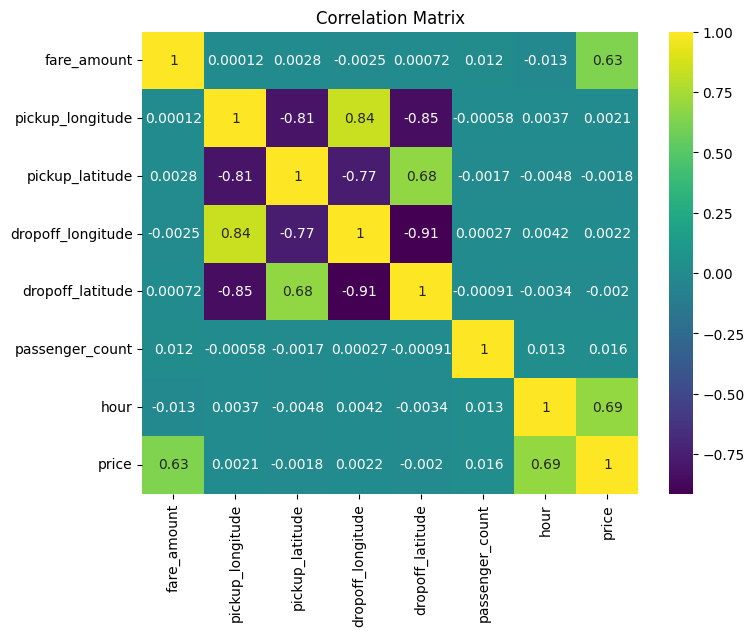

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [21]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [24]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [25]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [26]:
# from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{model_name} - R2: {r2:.4f}, RMSE: {rmse:.2f}')

In [27]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

Linear Regression - R2: 0.7917, RMSE: 1.88
Ridge Regression - R2: 0.7917, RMSE: 1.88
Lasso Regression - R2: 0.7887, RMSE: 1.90
